In [63]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense , Flatten , BatchNormalization

In [64]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [65]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [66]:
X_train = X_train/255
X_test = X_test/255

In [67]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = "relu"))

model.add(Dense(10 , activation = "softmax"))

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , optimizer = "adam" , metrics = ['accuracy'])

In [70]:
history = model.fit(X_train , y_train , epochs = 15 ,validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2682 - accuracy: 0.9222 - val_loss: 0.1388 - val_accuracy: 0.9580
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1121 - accuracy: 0.9658 - val_loss: 0.1104 - val_accuracy: 0.9654
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.1050 - val_accuracy: 0.9679
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0968 - val_accuracy: 0.9728
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.1087 - val_accuracy: 0.9679
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0968 - val_accuracy: 0.9749
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0989 - val_accuracy

In [72]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1175 - accuracy: 0.9792


[0.11754319816827774, 0.979200005531311]

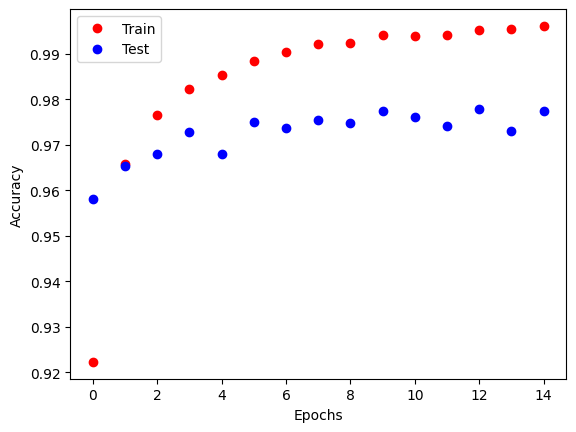

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'ro',label = "Train")
plt.plot(history.history['val_accuracy'],'bo', label = 'Test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(28, 28)


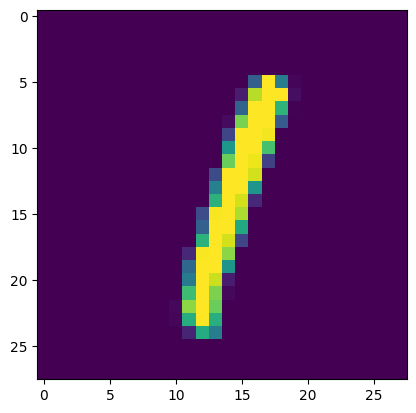

In [76]:
plt.imshow(X_test[5])
print(X_test[5].shape)

In [81]:
prediction = model.predict(X_test[5].reshape(1,28,28))
print(prediction.argmax(axis = 1))

1/1 [==============================] - 0s 24ms/step
[1]
